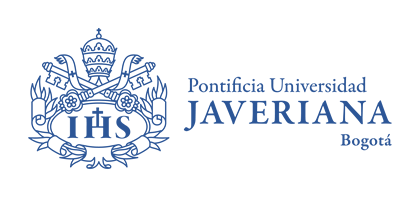

# Aprendizaje de máquina - Ejercicio k-means
El objetivo de este notebook es familiarizar al estudiante con el algoritmo k-means

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances


## Creación de un dataset aleatorio

Vamos a crear inicialmente un dataset sobre el cuál vamos a trabajar, vamos a trabajar inicialmente con puntos tomados de 3 distribuciones normales con parámetros diferentes.

In [3]:
# Centros de la distribución 1 sobre cada dimensión
means_1 =[0,0,0]
# Matriz de covarianza 1
cov_1=[[0.1,0,0],[0,0.1,0],[0,0,0.1]]
X1=np.random.multivariate_normal(means_1,cov_1,500)
print(X1.shape)
# Centros de la distribución 2 sobre cada dimensión
means_2 =[1,1,1]
# Matriz de covarianza 2
cov_2=[[0.2,0,0],[0,0.2,0],[0,0,0.2]]
X2=np.random.multivariate_normal(means_2,cov_2,500)
print(X2.shape)

# Centros de la distribución 3 sobre cada dimensión
means_3 =[-1,-1,-1]
# Matriz de covarianza 2
cov_3=[[0.25,0,0],[0,0.25,0],[0,0,0.25]]
X3=np.random.multivariate_normal(means_3,cov_2,500)
print(X3.shape)

(500, 3)
(500, 3)
(500, 3)


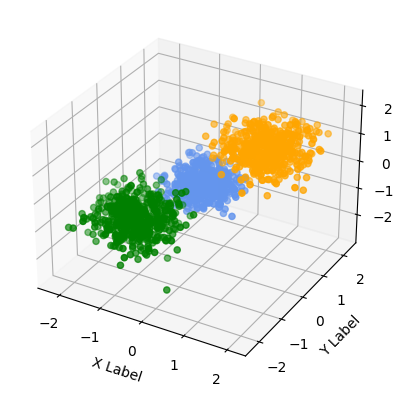

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X1[:,0], X1[:,1], X1[:,2], c='cornflowerblue')
ax.scatter(X2[:,0], X2[:,1], X2[:,2], c='orange')
ax.scatter(X3[:,0], X3[:,1], X3[:,2], c='green')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [5]:
# concatenamos los 3 datasets y los "desordena"
X=np.concatenate([X1,X2,X3])
np.random.shuffle(X)

In [6]:
X.shape

(1500, 3)

Text(0.5, 0, 'Z Label')

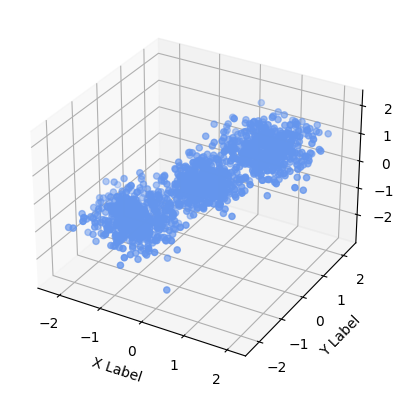

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c='cornflowerblue')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

Recordemos los pasos que debemos seguir para implementar K-means


1.   Inicializar los centroides representantes de cada grupo aleatoriamente
2.   Asignar cada instancia al cluster cuyo centroide sea el más cercano
3.   Actualizar los centroides
4.   Repetir hasta convergencia





## Inicialización centroides

Comencemos con la implementación de funciones para solucionar subproblemas. La primera función que vamos a definir es la inicialización de los centroides. Los puntos creados aleatoriamente deberían estar entre el mínimo y máximo de los datos conocidos en cada dimensión. Para definir la función `init_centroids` se puede apoyar de los siguientes fragmentos de código:

In [8]:
# Valores mínimos en cada dimensión
min_vals=np.min(X,axis=0)
print(min_vals)

[-2.22574451 -2.26799532 -2.71528602]


In [9]:

# Valores máximos en cada dimensión
max_vals=np.max(X,axis=0)
print(max_vals)

[2.10389815 2.30373464 2.19224805]


In [ ]:
# Creación de 10 instancias aleatorias entre los límites mínimo y máximo
np.random.uniform(low=min_vals,high=max_vals, size=(10,len(min_vals)))

In [10]:
# TODO: Implemente la siguiente función
def init_centroids(X,k):
  """
    Retorna una matriz numpy de tamaño (k,len(X[1]))
    con puntos aleatorios.


    Parameters:
    X: Matriz de instancias x características
    k: número de centroides a generar

    Returns:
    np.array Matriz de centroides.

  """
  # Genera k índices aleatorios únicos dentro del rango de índices de las filas de X
  indices = np.random.choice(X.shape[0], k, replace=False)
  # Selecciona las filas correspondientes a estos índices como los centroides
  centroids = X[indices]
  return centroids



In [11]:
# Correr para verificar
result=init_centroids(X,4)
print(result)
assert(result.shape==(4,X.shape[1]))
assert(np.all(X.min(axis=0)<=result.min(axis=0)))
assert(np.all(X.max(axis=0)>=result.max(axis=0)))

[[ 0.06452838  0.19750269 -0.18696525]
 [-0.31684486  0.18153814  0.22888989]
 [-0.68828212 -0.37887828  0.22388681]
 [-1.91365252 -0.952466   -1.06533469]]


## Asignación de puntos a cluster

Una vez inicializados los centroides, debemos establecer una forma para asignar cada instancia al centroide más cercano.

Al trabajar con datos es importante evitar al máximo iterar sobre los datos.

El algoritmo imperativo clásico para resolver este problema es cuadrático

```python
for i in X:
  dist_i = np.inf
  c_id= None
  for id, j in centroids:
    if dist(i,j) < dist_i:
      dist_i=dist(i,j)
      c_id=id
```

Para definir la función `closest_point` se puede apoyar de los siguientes fragmentos de código:

In [12]:
# Definimos matriz con 4 puntos para ejemplo
o1= np.array( [[1,1,1],[2,2,2],[3,3,3],[4,4,4]])
print(o1)
# Definimos matriz con 2 centroides para ejemplo
cent=np.array([[1.5,1.5,1.5],[3.5,3.5,3.5]])
print(cent)



[[1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]]
[[1.5 1.5 1.5]
 [3.5 3.5 3.5]]


In [13]:
# La función pariwise distances de sklearn permite comparar eficientemente las distancias entre los puntos de las 2 matrices
distances=pairwise_distances(o1,cent, metric='euclidean')
# El resultado es una matriz de distancias entre o1 y cada instancia de o2
distances


array([[0.8660254 , 4.33012702],
       [0.8660254 , 2.59807621],
       [2.59807621, 0.8660254 ],
       [4.33012702, 0.8660254 ]])

In [14]:
# Al llamar matriz.min(axis=1) obtenemos por cada punto qué distancia fue la menor

distances.min(axis=1)

array([0.8660254, 0.8660254, 0.8660254, 0.8660254])

In [15]:
# Al llamar matriz.argmin(axis=1) nos dice en qué coordenada esta el punto cuya distancia es mínima

distances.argmin(axis=1)

array([0, 0, 1, 1])

In [16]:
# TODO: Implemente la siguiente función
def closest_point(X,centroids):
  """
    Retorna una tupla donde la primera coordenada contiene un arreglo numpy con
    el identificador del punto más cercano de cada instancia a alguno de los
    centroides y la segunda tupla contiene un arreglo numpy con la distancia al
    identificador del punto más cercano


    Parameters:
    X: Matriz de instancias x características
    centroids: puntos centroides identificados

    Returns:
    tuple:  Posición 0, identificadores de punto más cercano
            Posición 1, distancias a los puntos
  """
  # Calcula las distancias euclidianas entre cada instancia en X y cada centroide
  distances = pairwise_distances(X, centroids, metric='euclidean')

  # Encuentra el índice del centroide más cercano para cada instancia en X
  closest_indices = np.argmin(distances, axis=1)

  # Encuentra la distancia mínima al centroide más cercano para cada instancia en X
  closest_distances = np.min(distances, axis=1)

  return (closest_indices, closest_distances)



Test unitario de la funcion "closest_point"

In [17]:
# Correr para verificar
from math import isclose

o_test= np.array( [[1,1,1],[2,2,2],[3,3,3],[4,4,4]])
cent_test=np.array([[1,1,1],[4,4,4]])
ids,dist=closest_point(o_test,cent_test)
assert((ids==[0,0,1,1]).all())
assert(dist[0]==0)
assert(isclose(dist[1],1.73205081,abs_tol=0.0001))
assert(isclose(dist[2],1.73205081,abs_tol=0.0001))
assert(dist[3]==0)

## Recalcular centroides

Una vez asignado cada punto a un centroide, hay que recalcular los centroides.

Revise los siguientes segmentos de código para completar la función solicitada

Aunque no es lo más eficiente, podemos solucionar rápidamente este problema utilizando pandas y la función groupby

In [18]:
X_pandas=pd.DataFrame(X)

In [19]:
X_pandas

,0,1,2
0,0.315728,-0.240823,-0.326142
1,-0.933366,-0.444714,-0.773157
2,0.033056,0.394463,1.086610
3,-1.599643,-1.195556,-1.210622
4,0.226856,-0.044757,0.422013
...,...,...,...
1495,-1.456223,-0.503949,-0.901043
1496,0.627273,1.400026,0.849170
1497,-0.866501,-0.153566,-1.074815
1498,-0.701293,-1.374557,-1.050760


In [20]:
# Asignación aleatoria en 3 labels de los datos
X_pandas['label']=np.random.randint(1, 4, X_pandas.shape[0])

In [21]:
X_pandas.groupby('label').mean()

,0,1,2
label,,,
1,-0.057114,-0.023304,-0.032548
2,0.061843,0.070308,0.042509
3,-0.001023,-0.011421,-0.023237


In [22]:
# Para obtener de nuevo la matriz puede llamar values sobre el dataframe
X_pandas.groupby('label').mean().values

array([[-0.05711374, -0.02330438, -0.03254777],
       [ 0.06184266,  0.07030796,  0.04250946],
       [-0.00102295, -0.01142053, -0.02323727]])

In [24]:
# TODO: Implemente la siguiente función
def new_centers(X,labels):
  """
    Retorna matriz numpy con los nuevos centroides, dada la asignación de cada punto a un cluster


    Parameters:
    X: Matriz de instancias x características
    labels: instancias asignadas

    Returns:
    np.array:  Matriz con los nuevos centroides
  """
  # Identifica el número de clusters como el número de etiquetas únicas en 'labels'
  num_clusters = len(np.unique(labels))

  # Crea un array para almacenar los centroides
  centroids = np.zeros((num_clusters, X.shape[1]))

  # Calcula el centroide de cada cluster
  for i in range(num_clusters):
      # Selecciona los puntos que pertenecen al cluster i
      cluster_points = X[labels == i]
      # Calcula el promedio de los puntos en el cluster
      centroids[i] = np.mean(cluster_points, axis=0)

  return centroids

In [25]:
# Correr para verificar
from math import isclose

o_test= np.array( [[1,1,1],[2,2,2],[3,3,3],[4,4,4]])
cent_test=np.array([[1,1,1],[4,4,4]])
ids,dist=closest_point(o_test,cent_test)
centers=new_centers(o_test,ids)
assert((centers[0]==[1.5,1.5,1.5]).all())
assert((centers[1]==[3.5, 3.5, 3.5]).all())

# Implementación k-means

Una vez implementadas estas tres funciones, podemos verificar cómo funciona k-means

In [26]:
# Busquemos 2 centroides iniciales
centroides_iniciales=init_centroids(X,2)

In [27]:
print(centroides_iniciales)

[[-0.14964965 -1.00573519 -0.55748132]
 [-0.7001543  -0.59651363 -0.42144398]]


In [28]:
#asignación de puntos a centroides
labels, distancias=closest_point(X,centroides_iniciales)

Text(0.5, 0, 'Z Label')

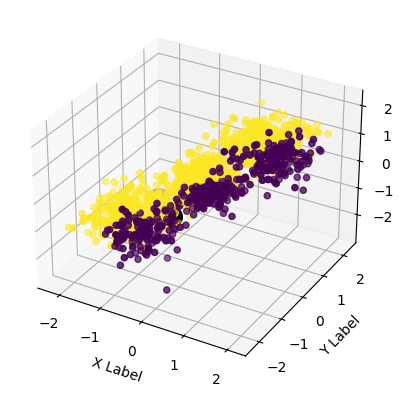

In [29]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=labels,cmap='viridis')
ax.scatter(centroides_iniciales[:, 0], centroides_iniciales[:, 1], centroides_iniciales[:,2], c='black',s=200)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [30]:
centroides_nuevos=new_centers(X, labels)


In [31]:
#asignación de puntos a centroides
nuevos_labels, distancias=closest_point(X,centroides_iniciales)

Text(0.5, 0, 'Z Label')

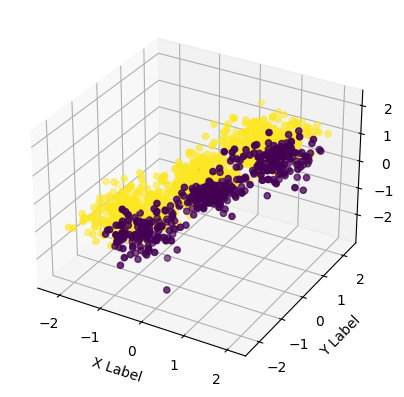

In [32]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=nuevos_labels,cmap='viridis')
ax.scatter(centroides_nuevos[:, 0], centroides_nuevos[:, 1], centroides_nuevos[:,2], c='black',s=200)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Ejercicio:

Terminar el ejericio de implementación de k-means

Reflexione sobre las siguientes preguntas para su implementación:
  ¿Cúantas veces tenemos que repetir la asignación?
  ¿Cómo determinar que ya finalizamos?

In [33]:
import numpy as np

def k_means(X, k, max_iters=100, tol=1e-4):
    # Paso 1: Inicializar los centroides seleccionando 'k' puntos aleatorios de 'X'
    centroids = init_centroids(X, k)

    for iteration in range(max_iters):
        # Paso 2: Asignar cada punto al centroide más cercano
        labels, distances = closest_point(X, centroids)

        # Paso 3: Calcular los nuevos centroides a partir de las asignaciones
        new_centroids = new_centers(X, labels)

        # Paso 4: Verificar la convergencia (si los centroides no cambian mucho, detenerse)
        centroid_shift = np.linalg.norm(new_centroids - centroids)
        if centroid_shift < tol:
            break

        # Actualizar centroides para la próxima iteración
        centroids = new_centroids

    return centroids, labels

# Ejemplo de uso
k = 3
final_centroids, final_labels = k_means(X, k)


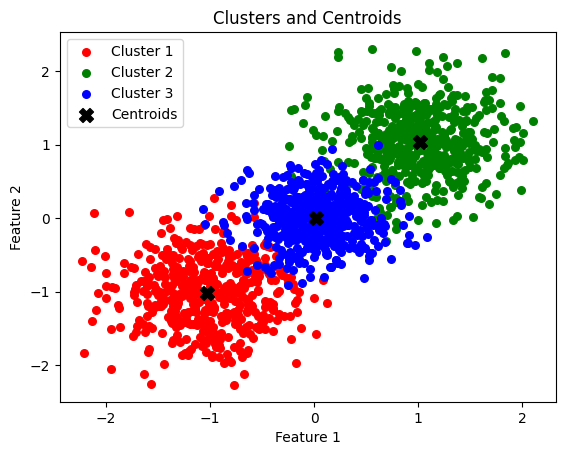

In [34]:
import matplotlib.pyplot as plt

def plot_k_means(X, centroids, labels, k):
    colors = ['r', 'g', 'b', 'y', 'c', 'm']  # Colores para los diferentes clusters

    # Crear un gráfico de dispersión de los puntos coloreando por etiqueta de cluster
    for i in range(k):
        # Puntos en el cluster i
        points = X[labels == i]
        # Graficar puntos
        plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[i], label=f'Cluster {i+1}')

    # Graficar los centroides
    plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', label='Centroids', marker='X')

    plt.title('Clusters and Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

k = 3  # Número de clusters
final_centroids, final_labels = k_means(X, k)  # Ejecutar k-means

plot_k_means(X, final_centroids, final_labels, k)  # Graficar resultados


Reflexión sobre las Preguntas

¿Cuántas veces tenemos que repetir la asignación?

El número de veces que la asignación debe ser repetida no es fijo y depende de varios factores:
- **Convergencia del Algoritmo:** Generalmente se repite hasta que los centroides no cambian significativamente entre iteraciones, lo cual se mide usando una norma (distancia) entre los conjuntos de centroides de iteraciones consecutivas.
- **Máximo Número de Iteraciones:** Para evitar que el algoritmo corra indefinidamente (en casos de datos muy irregulares o malas inicializaciones), se establece un número máximo de iteraciones (`max_iters`).

¿Cómo determinar que ya finalizamos?

El criterio de terminación para K-means puede ser determinado por:
- **Estabilidad de Centroides:** El algoritmo termina si el cambio en los centroides (medido por una norma como la Euclidiana) es menor que un umbral de tolerancia (`tol`). Esto indica que los centroides han "convergido" y ya no se mueven mucho.
- **Máximo de Iteraciones:** Como medida de seguridad contra bucles infinitos y para garantizar que el algoritmo termine, se puede fijar un límite superior en el número de iteraciones.

Estos mecanismos aseguran que K-means llegue a un punto de parada razonable y proporcionan una buena partición de los datos dado un número correcto de clusters y una inicialización adecuada.